In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Problem 1

Use the finite element method to solve
$$ εy'' − y' = −1, $$

$$ y(0) = α, y(1) = β,$$

where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution
$$
y(x) = α + x + (β − α − 1) \frac{e^{x/ε} − 1}{e^{1/ε} − 1}
$$

In [19]:
def finite_element(a,b,e,points):
    """ Solves the differential equation at the given points using finite element method"""
    h = points[1:] - points[:-1]

    a_right = e/h[1:] - 1/2
    a_center = -e/h[:-1] - e/h[1:]
    a_left = e/h[:-1] + 1/2

    ab = np.vstack((np.hstack((0,0,a_right)),
                    np.hstack((1,a_center,1)),
                    np.hstack((a_left,0,0))))
    
    l = (-1/2)*(h[:-1] + h[1:])
    phi = np.hstack(([a], l, [b]))
    
    k = la.solve_banded((1,1),ab,phi)
    return k

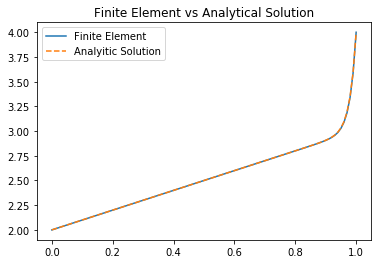

In [20]:
a = 2
b = 4
e = 0.02
N = 100
points = np.linspace(0,1,N+1)

# Calculate finite element approximation
y_appx = finite_element(a,b,e, points)

# Plot finite element
plt.plot(points, y_appx, label="Finite Element")


# Plot the anaylytic solution
y_true = lambda x: a + x + (b-a-1) * (np.exp(x/e)- 1) / (np.exp(1/e) - 1)
plt.plot(np.linspace(0,1,101),y_true(np.linspace(0,1,101)),'--',label="Analyitic Solution")
plt.legend()
plt.title("Finite Element vs Analytical Solution")
plt.show()

## Problem 2

One of the strengths of the finite element method is the ability to generate grids
that better suit the problem. The solution of (10.5) changes most rapidly near x = 1. Compare
the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change; see Figure 10.4. Specifically, use the grid points
defined by

    even_grid = np.linspace(0,1,15)
    clustered_grid = np.linspace(0,1,15)**(1./8)

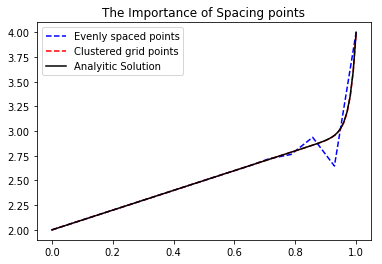

In [21]:
even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1./8)

# calculate both ways
even_sol = finite_element(a,b,e,even_grid)
clustered_sol = finite_element(a,b,e,clustered_grid)

# plot both ways
plt.plot(even_grid, even_sol, 'b--', label="Evenly spaced points")
plt.plot(clustered_grid, clustered_sol, 'r--',label="Clustered grid points")

# plot analytic solution
plt.plot(np.linspace(0,1,101),y_true(np.linspace(0,1,101)),'k',label="Analyitic Solution")
plt.legend()
plt.title("The Importance of Spacing points")
plt.show()

## Problem 3

Higher order methods promise faster convergence, but typically require more work
to code. So why do we use them when a low order method will converge just as well, albeit
with more grid points? The answer concerns the roundoff error associated with floating point arithmetic. Low order methods generally require more floating point operations, so roundoff
error has a much greater effect.

The finite element method introduced here is a second order method, even though the
approximate solution is piecewise linear. (To see this, note that if the grid points are evenly
spaced, the matrix A in (10.4) is exactly the same as the matrix for the second order centered
finite difference method.)

Solve (10.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error; see Figure 10.5.

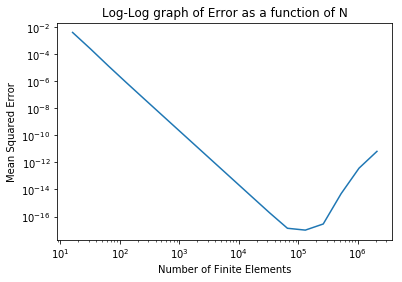

In [25]:
N = 2**np.arange(4,22)
even_err = []
clust_err = []

for n in N:
    even_grid = np.linspace(0,1,n+1)

    # calculate both ways
    even_sol = finite_element(a,b,e,even_grid)

    # store the mean squared error at each point
    even_true = y_true(even_grid)
    
    err = ((even_true - even_sol)**2).mean()
    even_err.append(err)

# Plot the error
plt.loglog(N,even_err)
plt.title("Log-Log graph of Error as a function of N")
plt.xlabel("Number of Finite Elements")
plt.ylabel("Mean Squared Error")
plt.show()
    
